Effect                 perception complexity  ignore priority  \
Cause                                                           
perception complexity                    0.0              0.0   
ignore priority                          0.0              0.0   
non-caution predictor                    0.0              0.0   
prediction error                         0.0              0.0   
ignore decision                          0.0              0.0   
follow decision                          0.0              0.0   
yield decision                           0.0              0.0   
overtake decision                        0.0              0.0   
planning error                           0.0              0.0   
execution error                          0.0              0.0   
accident                                 0.0              0.0   

Effect                 non-caution predictor  prediction error  \
Cause                                                            
perception complexity 

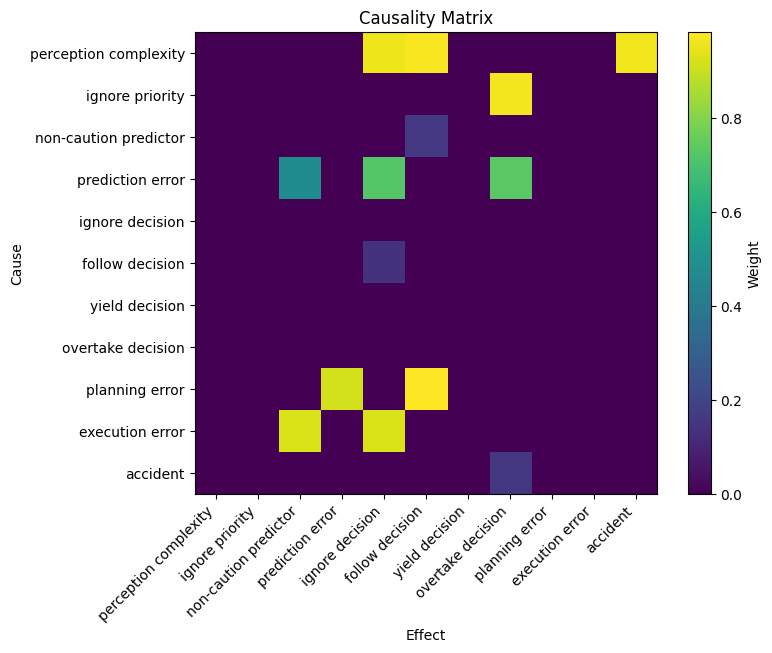

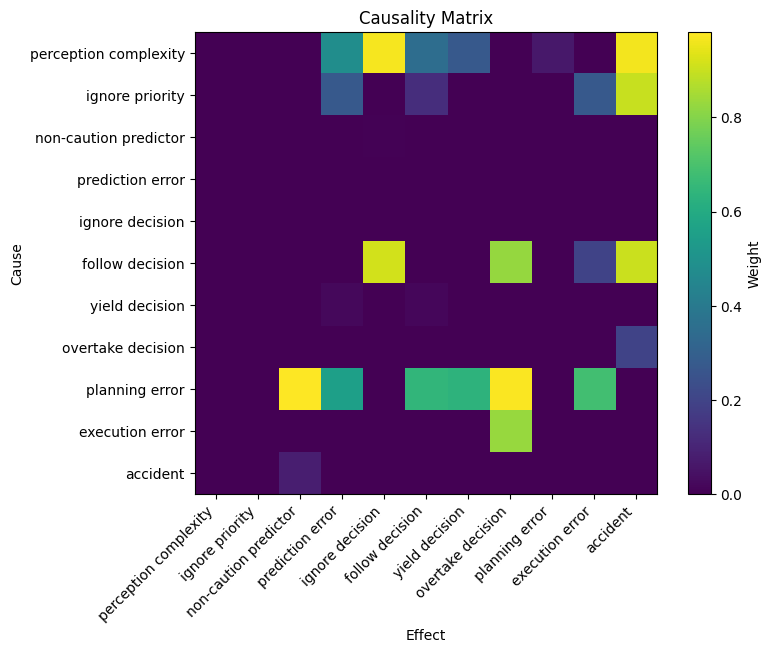

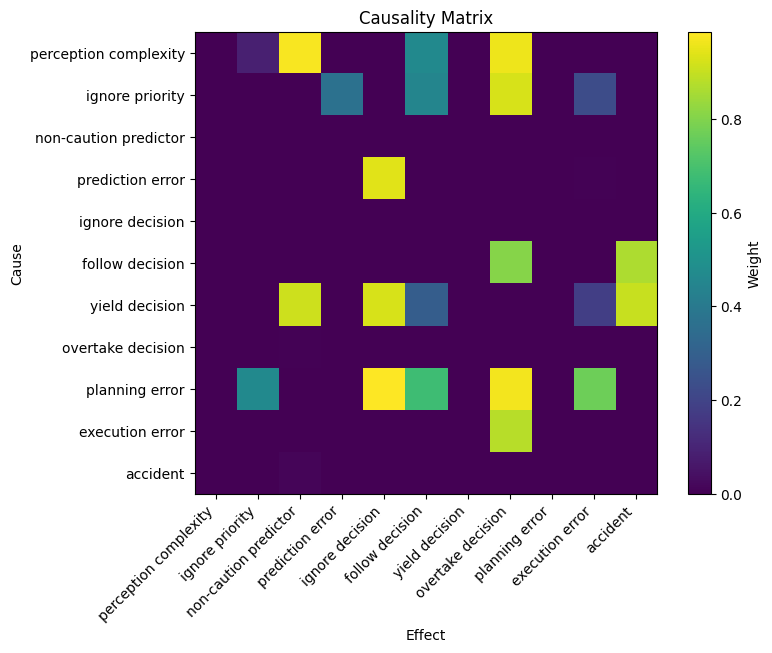

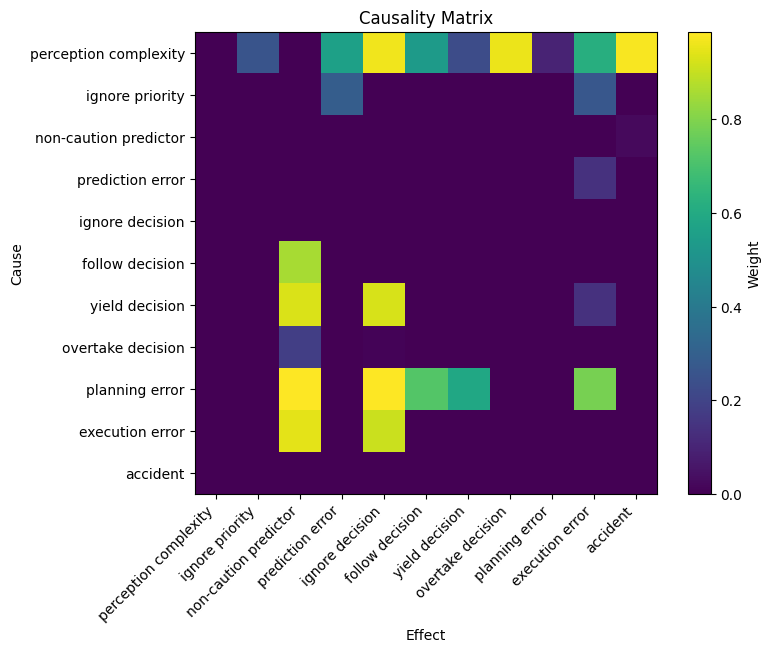

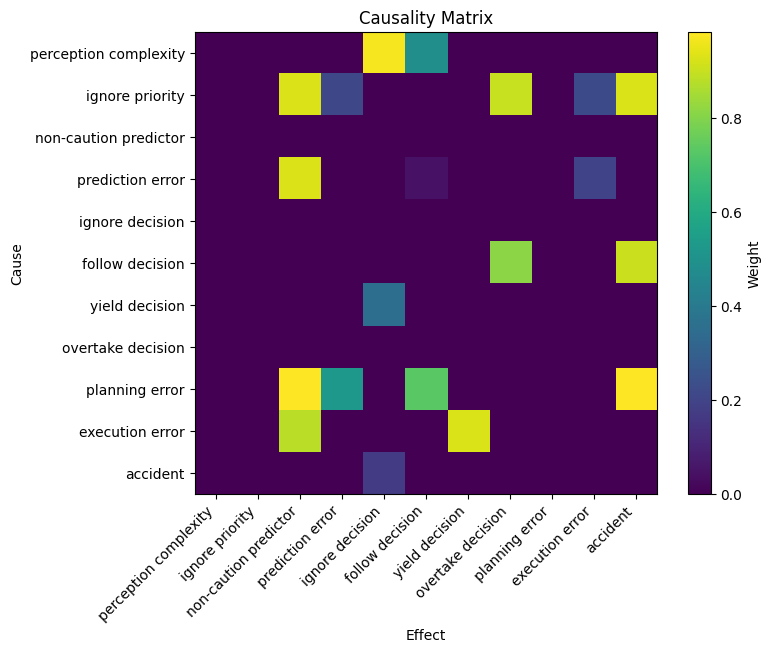

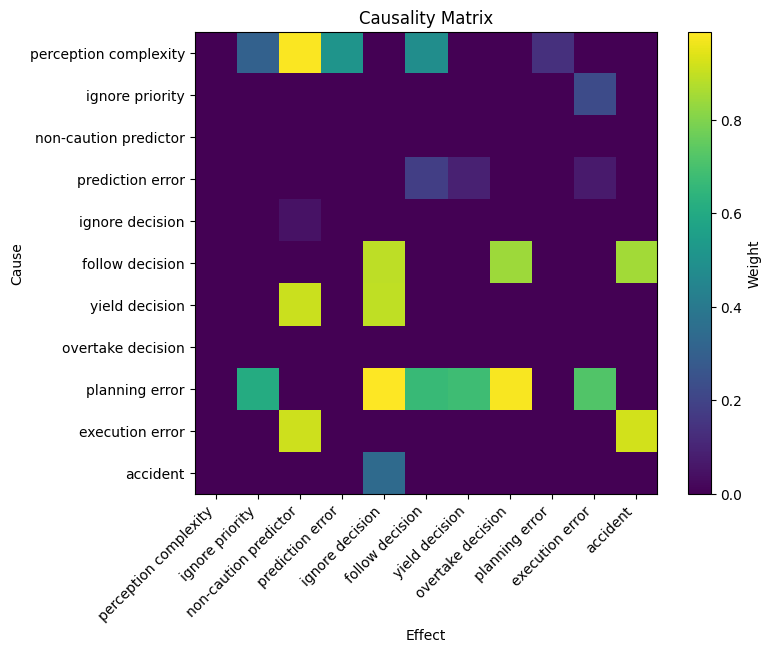

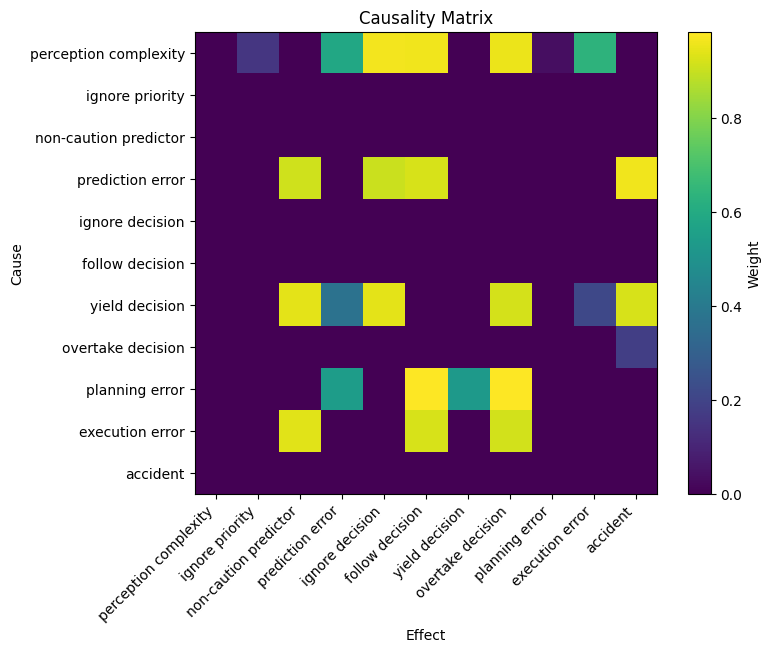

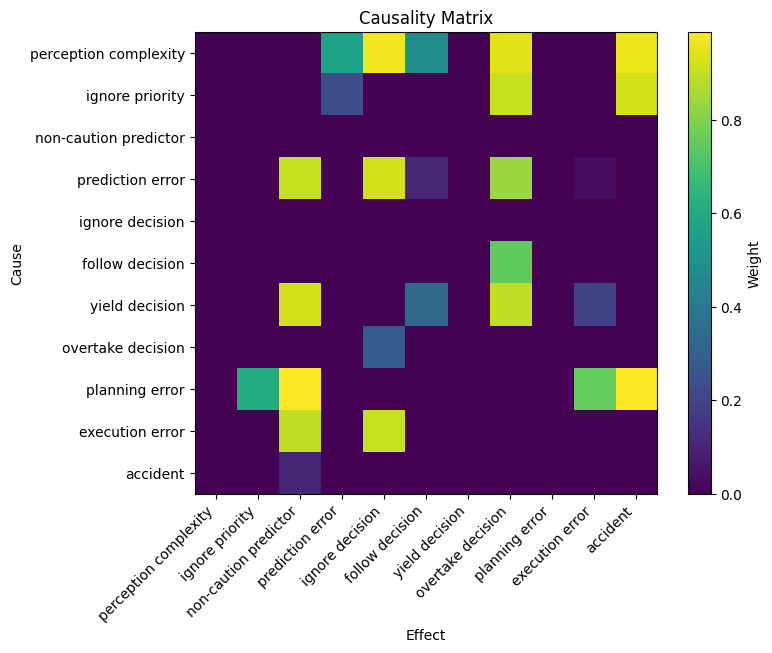

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
root_dir="results_FSGNN"
files=os.listdir(root_dir)
SAM_results=[file for file in files if file.endswith(".csv")]
for file_path in SAM_results:
        df = pd.read_csv(root_dir+"/"+file_path)
        savename=os.path.basename(file_path)[:-4]


        # df = pd.DataFrame(data)

        # 新的数据结构
        columns = ["perception complexity", "ignore priority", "non-caution predictor", "prediction error",
                "ignore decision", "follow decision", "yield decision", "overtake decision",
                "planning error", "execution error", "accident"]

        # 使用pivot_table将DataFrame转换为矩阵
        matrix = df.pivot_table(index='Cause', columns='Effect', values='Score', aggfunc='mean', fill_value=0)

        # 重新排列矩阵的行和列
        matrix = matrix.reindex(index=columns, columns=columns)
        matrix.fillna(0, inplace=True)
        print(matrix)
        np.save(root_dir+"//Matrix//"+savename+"_matrix.npy",matrix.values)
        # 创建绘图
        plt.figure(figsize=(8, 6))
        plt.imshow(matrix.values, cmap='viridis', interpolation='nearest')
        plt.colorbar(label='Weight')
        plt.title('Causality Matrix')
        plt.xlabel('Effect')
        plt.ylabel('Cause')
        plt.xticks(np.arange(len(columns)), columns, rotation=45, ha="right")
        plt.yticks(np.arange(len(columns)), columns)
        plt.savefig(root_dir+'//Matrix//'+savename+".png")

        # 显示图像
        # plt.show()


In [9]:
import os
files=os.listdir("results_SAM")
SAM_results=[file for file in files if file.endswith(".csv")]
print(SAM_results)
for i in SAM_results:
    print(os.path.basename(i)[:-4])

['SAM_follow_closely.csv', 'SAM_ignore_by_default.csv', 'SAM_ignore_moving_crossing.csv', 'SAM_ignore_static_close_obstacles.csv', 'SAM_not_enough_caution.csv', 'SAM_obstacle_cost.csv', 'SAM_overtake_behind.csv', 'SAM_yield_ahead.csv']
SAM_follow_closely
SAM_ignore_by_default
SAM_ignore_moving_crossing
SAM_ignore_static_close_obstacles
SAM_not_enough_caution
SAM_obstacle_cost
SAM_overtake_behind
SAM_yield_ahead
